**This table will not be combined with inpatient data**

**features**:

num_visits: total number of visits

stay_length: total length of unit stays (use service mean stay length to impute)

num_cvd_diagnosis: number of readmissions that are caused by cardiovascular

CVD: whether the patient has a cardiovescular diagnosis

*Different Age bins*: number of unit stays within this age range

age_mean: the mean admission age for each patient

age_std: the std of the admission age for each patient

AO: whether this patinet has been exposed to Agentorange


In [1]:
import pandas as pd

import numpy as np
import pandas as pd

import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import preprocess_data 
from tqdm.auto import tqdm
import math

reload(preprocess_data)

%matplotlib inline

In [2]:
datastype = "test"

In [3]:
if datastype == "train": outpatient_visits = pd.read_csv('/home/bhatti/dataset/VCHAMPS/outpatient_visits_train.csv', index_col=0)
if datastype == "test": outpatient_visits = pd.read_csv('/data/public/MLA/VCHAMPS-Test/outpatient_visits_test.csv', index_col=0)

/tmp/ipykernel_286346/1213885086.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  if datastype == "test": outpatient_visits = pd.read_csv('/data/public/MLA/VCHAMPS-Test/outpatient_visits_test.csv', index_col=0)


### Drop Combatflag, Ionizingradiationflag, Serviceconnectedflag, Swasiaconditionsflag, Agentorangeflag

In [4]:
outpatient_visits = outpatient_visits.drop([ 'Combatflag', 'Ionizingradiationflag', 'Serviceconnectedflag', 'Swasiaconditionsflag', 'Agentorangeflag'], axis=1)

### Age at visit

Divide to different age bins: (20-40], (40-60], (60-80], (80-100], (100-120]

In [5]:
print(outpatient_visits["Age at visit"].min())
print(outpatient_visits["Age at visit"].max())

17.598320666768
121.82691800298932


In [6]:
outpatient_visits['Age 00-20'] = [0] * len(outpatient_visits)
outpatient_visits['Age 20-40'] = [0] * len(outpatient_visits)
outpatient_visits['Age 40-60'] = [0] * len(outpatient_visits)
outpatient_visits['Age 60-80'] = [0] * len(outpatient_visits)
outpatient_visits['Age 80-100'] = [0] * len(outpatient_visits)
outpatient_visits['Age 100-120'] = [0] * len(outpatient_visits)
def age_category(data):
    data.loc[(data['Age at visit'] <= 20), 'Age 00-20'] = 1
    data.loc[(data['Age at visit'] > 20) & (data['Age at visit'] <= 40), 'Age 20-40'] = 1
    data.loc[(data['Age at visit'] > 40) & (data['Age at visit'] <= 60), 'Age 40-60'] = 1
    data.loc[(data['Age at visit'] > 60) & (data['Age at visit'] <= 80), 'Age 60-80'] = 1
    data.loc[(data['Age at visit'] > 80) & (data['Age at visit'] <= 100), 'Age 80-100'] = 1
    data.loc[(data['Age at visit'] > 100) & (data['Age at visit'] <= 120), 'Age 100-120'] = 1
    return data
outpatient_visits = age_category(outpatient_visits)
outpatient_visits

,Internalpatientid,Age at visit,Visit start date,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,Stop code,State,Age 00-20,Age 20-40,Age 40-60,Age 60-80,Age 80-100,Age 100-120
93,100,52.560034,2014-04-19 16:37:04.0,Not specified,Not specified,RESPIRATORY THERAPY,New York,0,0,1,0,0,0
94,100,52.898575,2014-08-21 10:17:59.0,Not specified,Not specified,HBPC Nursing (RN / LP),New York,0,0,1,0,0,0
95,100,53.184501,2014-12-03 22:26:25.0,Not specified,Not specified,ADMIN PAT ACTIVTIES (MASNONCT),New York,0,0,1,0,0,0
96,100,54.002069,2015-09-28 18:09:01.0,Not specified,Not specified,OCCUPATIONAL THERAPY,New York,0,0,1,0,0,0
97,100,54.337489,2016-01-29 08:27:08.0,Not specified,Not specified,TELEPHONE HBPC,New York,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105227001,99997,86.874842,2016-01-06 18:07:06.0,Not specified,Not specified,PRIMARY CARE/MEDICINE,North Carolina,0,0,0,0,1,0
105227002,99997,87.321281,2016-06-17 22:16:50.0,Not specified,Not specified,TELEPHONE PRIMARY CARE,North Carolina,0,0,0,0,1,0
105227003,99997,88.378729,2017-07-09 10:12:41.0,"Bladder disorder, unspecified",Not specified,CLINICAL PHARMACY,North Carolina,0,0,0,0,1,0
105227004,99997,88.523673,2017-08-31 09:39:49.0,"Alzheimer's disease, unspecified",Sleep apnea,MENTAL HEALTH CLINIC - IND,North Carolina,0,0,0,0,1,0


### Cardiovascular

In [7]:
cardiovascular = ["Heart failure, unspecified", "Other heart failure",
                  "Cardiogenic shock", "Hypertensive heart disease with heart failure",
                  "Hypertensive heart and kidney disease with heart failure", "Unstable angina", "Other forms of chronic ischemic heart disease",
                  "Atherosclerotic heart disease of native coronary artery", "Atrial fibrillation", "Atrial flutter",
                  "Supraventricular tachycardia", "Ventricular tachycardia"]

In [8]:
outpatient_visits["CVD_outpatient"] = [0] * len(outpatient_visits)
def cd_diagnosis(data):
    data.loc[(data["Second listed diagnosis icd10 subcategory"].str.contains('|'.join(cardiovascular))
      | data["Second listed diagnosis icd10 subcategory"].str.contains("Systolic (congestive) heart failure", regex=False)
      | data["Second listed diagnosis icd10 subcategory"].str.contains("Diastolic (congestive) heart failure", regex=False)
      | data["Second listed diagnosis icd10 subcategory"].str.contains("Combined systolic (congestive) and diastolic (congestive) heart failure", regex=False)
      | data["Second listed diagnosis icd10 subcategory"].str.contains("ST elevation (STEMI) myocardial infarction", regex=False)
      | data["Second listed diagnosis icd10 subcategory"].str.contains("Non-ST elevation (NSTEMI) myocardial infarction", regex=False)
      | data["First listed diagnosis icd10 subcategory"].str.contains('|'.join(cardiovascular))
      | data["First listed diagnosis icd10 subcategory"].str.contains("Systolic (congestive) heart failure", regex=False)
      | data["First listed diagnosis icd10 subcategory"].str.contains("Diastolic (congestive) heart failure", regex=False)
      | data["First listed diagnosis icd10 subcategory"].str.contains("Combined systolic (congestive) and diastolic (congestive) heart failure", regex=False)
      | data["First listed diagnosis icd10 subcategory"].str.contains("ST elevation (STEMI) myocardial infarction", regex=False)
      | data["First listed diagnosis icd10 subcategory"].str.contains("Non-ST elevation (NSTEMI) myocardial infarction", regex=False)), "CVD_outpatient"] = 1
    return data
outpatient_visits = cd_diagnosis(outpatient_visits)
outpatient_visits


,Internalpatientid,Age at visit,Visit start date,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,Stop code,State,Age 00-20,Age 20-40,Age 40-60,Age 60-80,Age 80-100,Age 100-120,CVD_outpatient
93,100,52.560034,2014-04-19 16:37:04.0,Not specified,Not specified,RESPIRATORY THERAPY,New York,0,0,1,0,0,0,0
94,100,52.898575,2014-08-21 10:17:59.0,Not specified,Not specified,HBPC Nursing (RN / LP),New York,0,0,1,0,0,0,0
95,100,53.184501,2014-12-03 22:26:25.0,Not specified,Not specified,ADMIN PAT ACTIVTIES (MASNONCT),New York,0,0,1,0,0,0,0
96,100,54.002069,2015-09-28 18:09:01.0,Not specified,Not specified,OCCUPATIONAL THERAPY,New York,0,0,1,0,0,0,0
97,100,54.337489,2016-01-29 08:27:08.0,Not specified,Not specified,TELEPHONE HBPC,New York,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105227001,99997,86.874842,2016-01-06 18:07:06.0,Not specified,Not specified,PRIMARY CARE/MEDICINE,North Carolina,0,0,0,0,1,0,0
105227002,99997,87.321281,2016-06-17 22:16:50.0,Not specified,Not specified,TELEPHONE PRIMARY CARE,North Carolina,0,0,0,0,1,0,0
105227003,99997,88.378729,2017-07-09 10:12:41.0,"Bladder disorder, unspecified",Not specified,CLINICAL PHARMACY,North Carolina,0,0,0,0,1,0,0
105227004,99997,88.523673,2017-08-31 09:39:49.0,"Alzheimer's disease, unspecified",Sleep apnea,MENTAL HEALTH CLINIC - IND,North Carolina,0,0,0,0,1,0,0


In [9]:
outpatient_visits.columns

Index(['Internalpatientid', 'Age at visit', 'Visit start date',
       'First listed diagnosis icd10 subcategory',
       'Second listed diagnosis icd10 subcategory', 'Stop code', 'State',
       'Age 00-20', 'Age 20-40', 'Age 40-60', 'Age 60-80', 'Age 80-100',
       'Age 100-120', 'CVD_outpatient'],
      dtype='object')

In [10]:
outpatient_visits = outpatient_visits.drop(['First listed diagnosis icd10 subcategory', 'Second listed diagnosis icd10 subcategory'], axis=1)

#### Look into relationship

In [11]:
if datastype == "train":
    ed = pd.read_csv("/home/bhatti/dataset/VCHAMPS/ed_visits_train.csv", index_col=0)
    in_ad = pd.read_csv("/home/bhatti/dataset/VCHAMPS/inpatient_admissions_train.csv", index_col=0)
else:
    ed = pd.read_csv("/data/public/MLA/VCHAMPS-Test/ed_visits_test.csv", index_col=0)
    in_ad = pd.read_csv("/data/public/MLA/VCHAMPS-Test/inpatient_admissions_test.csv", index_col=0)

In [12]:
print("These patients are in outpatient dataset but not in ed_visits")
print(list(set(outpatient_visits["Internalpatientid"].unique()) - set(ed["Internalpatientid"].unique())))

print("These patients are in ed dataset but not in outpatient")
print(list(set(ed["Internalpatientid"].unique()) - set(outpatient_visits["Internalpatientid"].unique())))

temp = set(outpatient_visits["Internalpatientid"].unique()) - set(ed["Internalpatientid"].unique())
x = temp - set(in_ad["Internalpatientid"].unique())
print(len(x))

These patients are in outpatient dataset but not in ed_visits
[131072, 163840, 131075, 32771, 65541, 6, 163847, 32776, 131081, 9, 163849, 12, 98317, 65550, 17, 131090, 32787, 98323, 65558, 98326, 163864, 65564, 31, 65568, 163874, 32803, 32804, 98340, 32807, 98343, 163881, 98344, 32811, 131122, 163892, 98356, 65591, 163896, 32824, 65592, 131131, 163900, 64, 65, 66, 131140, 32837, 75, 163916, 65613, 78, 32847, 65615, 98384, 163922, 83, 98386, 32853, 131161, 90, 65630, 32864, 32865, 98400, 32867, 100, 32868, 163941, 98405, 105, 106, 107, 131177, 32876, 163950, 65647, 131184, 131185, 116, 32886, 131192, 163960, 65657, 163964, 65661, 126, 163972, 32900, 32902, 163976, 131209, 138, 131211, 140, 163980, 131214, 131215, 142, 145, 32909, 163985, 32915, 32917, 65679, 98454, 152, 131225, 153, 163994, 32924, 65691, 131230, 131231, 160, 163998, 131234, 131235, 164000, 32931, 65698, 167, 65700, 131241, 131242, 164011, 65707, 98469, 98472, 98478, 131251, 32948, 32949, 164023, 65721, 65722, 131259, 32

In [13]:
print(ed["Internalpatientid"].nunique())
print(in_ad["Internalpatientid"].nunique())
print(outpatient_visits["Internalpatientid"].nunique())

15370
22255
34810


#### Filter out visits that occur after death

In [14]:
if datastype == "train": death = pd.read_csv("/home/bhatti/dataset/VCHAMPS/death_train.csv", index_col=0)
if datastype == "test": death = pd.read_csv("/data/public/MLA/VCHAMPS-Test/death_test.csv", index_col=0)

In [15]:
outpatient_visits = outpatient_visits.merge(death, how="left",on="Internalpatientid")
outpatient_visits['Visit start date'] = pd.to_datetime(outpatient_visits['Visit start date'])
outpatient_visits['Death date'] = pd.to_datetime(outpatient_visits['Death date'])
outpatient_visits = outpatient_visits[~(outpatient_visits["Visit start date"] > outpatient_visits['Death date'])]

In [16]:
outpatient_visits

,Internalpatientid,Age at visit,Visit start date,Stop code,State,Age 00-20,Age 20-40,Age 40-60,Age 60-80,Age 80-100,Age 100-120,CVD_outpatient,Age at death,Death date
0,100,52.560034,2014-04-19 16:37:04,RESPIRATORY THERAPY,New York,0,0,1,0,0,0,0,55.454300,2017-03-12 13:07:14
1,100,52.898575,2014-08-21 10:17:59,HBPC Nursing (RN / LP),New York,0,0,1,0,0,0,0,55.454300,2017-03-12 13:07:14
2,100,53.184501,2014-12-03 22:26:25,ADMIN PAT ACTIVTIES (MASNONCT),New York,0,0,1,0,0,0,0,55.454300,2017-03-12 13:07:14
3,100,54.002069,2015-09-28 18:09:01,OCCUPATIONAL THERAPY,New York,0,0,1,0,0,0,0,55.454300,2017-03-12 13:07:14
4,100,54.337489,2016-01-29 08:27:08,TELEPHONE HBPC,New York,0,0,1,0,0,0,0,55.454300,2017-03-12 13:07:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21906647,99997,86.874842,2016-01-06 18:07:06,PRIMARY CARE/MEDICINE,North Carolina,0,0,0,0,1,0,0,91.296009,2020-06-09 16:35:21
21906648,99997,87.321281,2016-06-17 22:16:50,TELEPHONE PRIMARY CARE,North Carolina,0,0,0,0,1,0,0,91.296009,2020-06-09 16:35:21
21906649,99997,88.378729,2017-07-09 10:12:41,CLINICAL PHARMACY,North Carolina,0,0,0,0,1,0,0,91.296009,2020-06-09 16:35:21
21906650,99997,88.523673,2017-08-31 09:39:49,MENTAL HEALTH CLINIC - IND,North Carolina,0,0,0,0,1,0,0,91.296009,2020-06-09 16:35:21


In [17]:
outpatient_visits["Died"] = [1] * len(outpatient_visits)
outpatient_visits.loc[outpatient_visits["Death date"].isna(), "Died"] = 0

In [18]:
outpatient_visits['Visit start date'] = pd.to_datetime(outpatient_visits['Visit start date'])
outpatient_visits['Death date'] = pd.to_datetime(outpatient_visits['Death date'])
outpatient_visits["away_from_death"] = (outpatient_visits['Death date'] - outpatient_visits['Visit start date']).dt.days
outpatient_visits

,Internalpatientid,Age at visit,Visit start date,Stop code,State,Age 00-20,Age 20-40,Age 40-60,Age 60-80,Age 80-100,Age 100-120,CVD_outpatient,Age at death,Death date,Died,away_from_death
0,100,52.560034,2014-04-19 16:37:04,RESPIRATORY THERAPY,New York,0,0,1,0,0,0,0,55.454300,2017-03-12 13:07:14,1,1057.0
1,100,52.898575,2014-08-21 10:17:59,HBPC Nursing (RN / LP),New York,0,0,1,0,0,0,0,55.454300,2017-03-12 13:07:14,1,934.0
2,100,53.184501,2014-12-03 22:26:25,ADMIN PAT ACTIVTIES (MASNONCT),New York,0,0,1,0,0,0,0,55.454300,2017-03-12 13:07:14,1,829.0
3,100,54.002069,2015-09-28 18:09:01,OCCUPATIONAL THERAPY,New York,0,0,1,0,0,0,0,55.454300,2017-03-12 13:07:14,1,530.0
4,100,54.337489,2016-01-29 08:27:08,TELEPHONE HBPC,New York,0,0,1,0,0,0,0,55.454300,2017-03-12 13:07:14,1,408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21906647,99997,86.874842,2016-01-06 18:07:06,PRIMARY CARE/MEDICINE,North Carolina,0,0,0,0,1,0,0,91.296009,2020-06-09 16:35:21,1,1615.0
21906648,99997,87.321281,2016-06-17 22:16:50,TELEPHONE PRIMARY CARE,North Carolina,0,0,0,0,1,0,0,91.296009,2020-06-09 16:35:21,1,1452.0
21906649,99997,88.378729,2017-07-09 10:12:41,CLINICAL PHARMACY,North Carolina,0,0,0,0,1,0,0,91.296009,2020-06-09 16:35:21,1,1066.0
21906650,99997,88.523673,2017-08-31 09:39:49,MENTAL HEALTH CLINIC - IND,North Carolina,0,0,0,0,1,0,0,91.296009,2020-06-09 16:35:21,1,1013.0


### Final dataset

In [19]:
tidy_dataset = []
for ids, group in tqdm(outpatient_visits.groupby("Internalpatientid")):
    # group = group.sort_values(by = ['Visit start date'],ascending=True).reset_index(drop = True)
    num_visits = group["Age at visit"].nunique()

    age_mean = group["Age at visit"].mean()
    age_std = group["Age at visit"].std()
    if group["Age at visit"].nunique() == 1: age_std = 0

    min_age = group["Age at visit"].min()
    max_age = group["Age at visit"].max()
    freq = len(group)/(math.floor(max_age - min_age) + 1)

    # num_cvd_visits = group['CVD_outpatient'].sum()
    if  group['CVD_outpatient'].sum() > 0: CVD = 1
    else: CVD = 0

    last_visit_date = group["Visit start date"].max()
    away_from_death = group["away_from_death"].min()

    if group["Died"].sum() > 0: died = 1
    else: died = 0

    df = pd.DataFrame(data={'Internalpatientid': [ids], 'num_visits': [len(group)], 
                            "CVD": [CVD], "last_visit_date": [last_visit_date], "Age 00-20": group["Age 00-20"].sum(),
                            'Age 20-40': group["Age 20-40"].sum(), 'Age 40-60': group["Age 40-60"].sum(), 'Age 60-80':group["Age 60-80"].sum(), 
                            'Age 80-100':group["Age 80-100"].sum(), 'Age 100-120':group["Age 100-120"].sum(), 
                            "age_mean": [age_mean], "age_std": [age_std], "freq": [round(freq,2)], "Died": [died], "away_from_death": [away_from_death]
                            })
    
    df = df.reset_index(drop=True)
    tidy_dataset.append(df)
    
tidy_dataset = pd.concat(tidy_dataset)

  0%|          | 0/34796 [00:00<?, ?it/s]

In [20]:
tidy_dataset.columns

Index(['Internalpatientid', 'num_visits', 'CVD', 'last_visit_date',
       'Age 00-20', 'Age 20-40', 'Age 40-60', 'Age 60-80', 'Age 80-100',
       'Age 100-120', 'age_mean', 'age_std', 'freq', 'Died',
       'away_from_death'],
      dtype='object')

In [21]:
tidy_dataset["away_from_death"].describe()

count    25312.000000
mean       121.068070
std        412.891639
min          0.000000
25%          1.000000
50%         10.000000
75%         54.000000
max       6721.000000
Name: away_from_death, dtype: float64

<Axes: ylabel='away_from_death'>

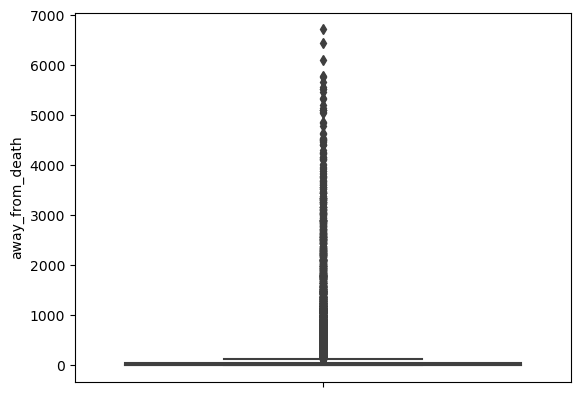

In [22]:
sns.boxplot(data= tidy_dataset, y ='away_from_death')

In [23]:
print(len(tidy_dataset[tidy_dataset["away_from_death"] < 125]))
print(len(tidy_dataset[tidy_dataset["away_from_death"] > 125]))

21457
3829


In [24]:
tidy_dataset['died_within_125days'] = [0] * len(tidy_dataset)

def age_category(data):
    data.loc[(data['away_from_death'] < 125), 'died_within_125days'] = 1
    return data
tidy_dataset = age_category(tidy_dataset)
tidy_dataset

,Internalpatientid,num_visits,CVD,last_visit_date,Age 00-20,Age 20-40,Age 40-60,Age 60-80,Age 80-100,Age 100-120,age_mean,age_std,freq,Died,away_from_death,died_within_125days
0,6,820,0,2014-10-16 01:23:22,0,0,0,356,464,0,81.400794,3.696306,58.57,1,78.0,1
0,7,6371,0,2020-11-23 13:17:39,0,0,2905,3466,0,0,60.958170,5.448019,277.00,0,NaN,0
0,9,83,0,2000-04-13 19:47:46,0,0,83,0,0,0,51.288521,0.454438,41.50,1,12.0,1
0,12,204,0,2004-07-18 11:56:33,0,0,0,204,0,0,71.991974,1.491836,34.00,1,8.0,1
0,17,252,0,2004-07-15 07:53:06,0,0,0,58,194,0,80.846346,0.903094,63.00,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,169037,920,1,2017-10-24 20:00:40,0,0,0,174,746,0,83.123918,3.590079,61.33,1,0.0,1
0,169045,50,1,2022-11-29 12:03:25,0,0,0,2,48,0,89.487163,6.982746,2.63,1,16.0,1
0,169058,88,0,2003-08-17 04:14:48,0,0,0,88,0,0,78.574109,0.258219,88.00,1,18.0,1
0,169059,507,0,2014-05-29 03:39:32,0,0,0,51,456,0,84.759156,3.533865,42.25,1,6.0,1


In [25]:
if datastype == "train": tidy_dataset.to_csv("/home/hassan/lily/MLA/FDA/outpatient_mortality.csv")
if datastype == "test": tidy_dataset.to_csv("/home/hassan/lily/MLA/FDA/outpatient_mortality_test.csv")